In [71]:
import matplotlib.pyplot as plt
import pandas as pd
%run ./utils.py

In [72]:
df = pd.DataFrame()
%run ./graph.py

In [1]:
d = df
d

NameError: name 'df' is not defined

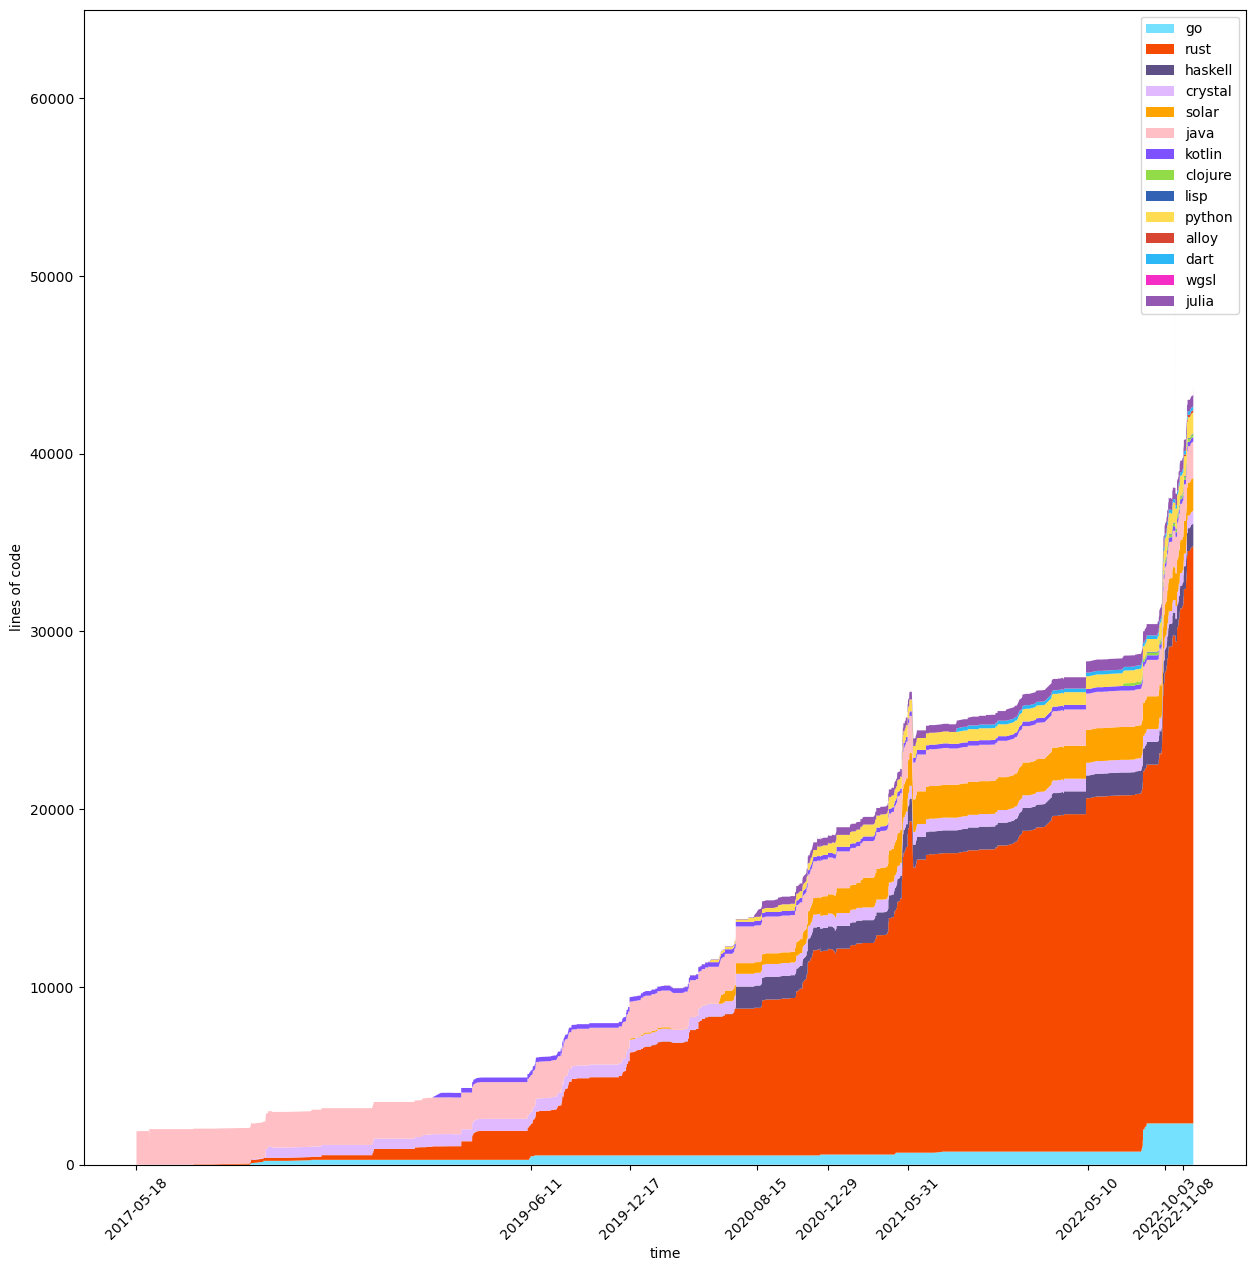

In [79]:
fig, ax = plt.subplots(figsize=(15, 15))

interesting = ['go', 'haskell', 'python', 'crystal', 'solar', 'java', 'kotlin', 'clojure', 'lisp', 'alloy', 'dart', 'wgsl', 'julia', 'rust']

def fmt(date):
    return date.split(" ")[0]

colors=[]
xlabels = list(map(fmt, d['date']))
y = []
labels = []
for _, kind in filetypes:
    if kind in ['c++', 'c#', 'javascript']:
        continue
    if kind not in interesting:
        continue

    values = d[kind]
    if len(values) == 0:
        continue

    labels.append(kind)
    y.append(values)
    c = langcolors[kind] if kind in langcolors else None
    colors.append(c)

x = d['unix']
ax.stackplot(x, y, labels=labels, colors=colors)
# ax.stackplot(x, y, labels=labels)
ax.legend()
ax.set_ylabel('lines of code')
ax.set_xlabel('time')

def skip(l, n):
    i = 0
    for elem in l:
        if i%n == 0:
            yield elem
        i+=1

def skipl(l, n):
    return list(skip(l, n))

s = 300
_ = ax.set_xticks(skipl(x, s), skipl(xlabels, s), rotation=45)
